<a href="https://colab.research.google.com/github/DavidSenseman/BIO1173/blob/main/Class_02_1_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---------------------------
**COPYRIGHT NOTICE:** This Jupyterlab Notebook is a Derivative work of [Jeff Heaton](https://github.com/jeffheaton) licensed under the Apache License, Version 2.0 (the "License"); You may not use this file except in compliance with the License. You may obtain a copy of the License at

> [http://www.apache.org/licenses/LICENSE-2.0](http://www.apache.org/licenses/LICENSE-2.0)

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language governing permissions and limitations under the License.

------------------------

# **BIO 1173: Intro Computational Biology**

**Module 2: Neural Networks with PyTorch**

* Instructor: [David Senseman](mailto:David.Senseman@utsa.edu), [Department of Biology, Health and the Environment](https://sciences.utsa.edu/bhe/), [UTSA](https://www.utsa.edu/)

### Module 2 Material

* **Part 2.1: Introduction to Neural Networks with PyTorch**
* Part 2.2: Encoding Feature Vectors
* Part 2.3: Controlling Overfitting
* Part 2.4: Saving and Loading a PyTorch Neural Network


## Google CoLab Instructions

You MUST run the following code cell to get credit for this class lesson. By running this code cell, you will map your GDrive to ```/content/drive```  and print out your Google GMAIL address. Your Instructor will use your GMAIL address to verify the author of this class lesson.

In [ ]:
# You must run this cell first
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    from google.colab import auth
    auth.authenticate_user()
    Colab = True
    print("Note: Using Google CoLab")
    import requests
    gcloud_token = !gcloud auth print-access-token
    gcloud_tokeninfo = requests.get('https://www.googleapis.com/oauth2/v3/tokeninfo?access_token=' + gcloud_token[0]).json()
    print(gcloud_tokeninfo['email'])
except:
    print("**WARNING**: Your GMAIL address was **not** printed in the output below.")
    print("**WARNING**: You will NOT receive credit for this lesson.")
    Colab = False

Mounted at /content/drive
Note: Using Google CoLab
david.senseman@gmail.com


You should see the following output except your GMAIL address should appear on the last line.

![___](https://biologicslab.co/BIO1173/images/class_02/class_02_1_image01A.png)

If your GMAIL address does not appear your lesson will **not** be graded.

## **Install ID and Keys**

Run the next cell to access the Colab Secrets for this lesson.

In [ ]:
# Install Keys
from google.colab import userdata
import os

# myUTSA IF
try:
    # 1. Get the key from Secrets
    UTSA_ID = userdata.get('myUTSA_ID')

    # 2. Set it as an environment variable
    os.environ['UTSA_ID'] = UTSA_ID

    print("UTSA_ID loaded and environment variable set successfully!")
    print(f"UTSA_ID:{UTSA_ID}")

except Exception as e:
    print(f"Error loading UTSA_ID: {e}")
    print("Please set your UTSA_ID in Google Colab:")
    print("1. Go to Secrets in the left sidebar (key icon)")
    print("2. Create a new secret named 'myUTSA_ID'")
    print("3. Enter your myUTSA ID ('abc123') and toggle 'Notebook access' on")


UTSA_ID loaded and environment variable set successfully!
UTSA_ID:gie856


If you have correctly installed your myUTSA id in your Colab Secrets, you should see something _similar_ to following but with your `myUTSA` ID:
```text
UTSA_ID loaded and environment variable set successfully!
UTSA_ID:gie856
```
However, if you see the following error message:
```text
Error loading UTSA_ID: Secret myUTSA_ID does not exist.
Please set your UTSA_ID in Google Colab:
1. Go to Secrets in the left sidebar (key icon)
2. Create a new secret named 'myUTSA_ID'
3. Enter your myUTSA ID ('abc123') and toggle 'Notebook access' on
```
You will need to fix this problem is your want you Colab notebook graded! Ask your Instructor or TA for help if you can't figure it out yourself --- that's what they are there.

### Create Custom Function

The cell below creates a custom function called `hms_string()`. This function is needed to record the time required to train your neural network model.

If you fail to run this cell now, you will receive one (or more) error message(s) later in this lesson.

In [ ]:
# Create custom function

# Simple function to print out elapsed time
def hms_string(sec_elapsed):
    h = int(sec_elapsed / (60 * 60))
    m = int((sec_elapsed % (60 * 60)) / 60)
    s = sec_elapsed % 60
    return "{}:{:>02}:{:>05.2f}".format(h, m, s)

print("Custom function `hms_string()` has been created ✅ ")

Custom function `hms_string()` has been created ✅ 


### **YouTube Introduction to Deep Learning and Neural Networks**

Run the next cell to see short introduction to Deep Learning and Neural Network. This is a suggested, but optional, part of the lesson.

In [ ]:
from IPython.display import HTML
video_id = "6M5VXKLf4D4"
HTML(f"""
<iframe width="560" height="315"
  src="https://www.youtube.com/embed/{video_id}"
  title="YouTube video player"
  frameborder="0"
  allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture"
  allowfullscreen
  referrerpolicy="strict-origin-when-cross-origin">
</iframe>
""")


# **Deep Learning and Neural Networks**

**Neural networks** were one of the first machine learning models. Their popularity has fallen twice and is now on its third rise. **Deep learning** implies the use of neural networks. The "deep" in deep learning refers to a neural network with many hidden layers. Because neural networks have been around for so long, they have quite a bit of baggage. Researchers have created many different training algorithms, activation/transfer functions, and structures. This course is only concerned with the latest, most current state-of-the-art techniques for deep neural networks. We will not spend much time discussing the history of neural networks.

Neural networks accept input and produce output. The input to a neural network is called the **_feature vector_**. The size of this vector is always a fixed length. Changing the size of the feature vector usually means recreating the entire neural network. Though the feature vector is called a "vector," this is not always the case. A vector implies a 1D array. Later we will learn about **Convolutional Neural Networks (CNNs)**, which can allow the input size to change without retraining the neural network. Historically the input to a neural network was always 1D. However, with modern neural networks, you might see input data, such as:

* **1D vector** - Classic input to a neural network, similar to rows in a spreadsheet. Common in predictive modeling.
* **2D Matrix** - Grayscale image input to a CNN.
* **3D Matrix** - Color image input to a CNN.
* **nD Matrix** - Higher-order input to a CNN.

Before CNNs, programs either encoded images to an intermediate form or sent the image input to a neural network by merely squashing the image matrix into a long array by placing the image's rows side-by-side. CNNs are different as the matrix passes through the neural network layers.

Initially, this lesson will focus on 1D input to neural networks. However, later lessons will focus more heavily on higher dimension input.

The term **dimension** can be confusing in neural networks. In the sense of a 1D input vector, dimension refers to how many elements are in that 1D array. For example, a neural network with ten input neurons has ten dimensions. However, now that we have CNNs, the input has dimensions. The input to the neural network will *usually* have 1, 2, or 3 dimensions. Four or more dimensions are unusual. You might have a 2D input to a neural network with 64x64 pixels. This configuration would result in 4,096 input neurons. This network is either 2D or 4,096D, depending on which dimensions you reference.


## **Neurons and Layers**

Most neural network architectures are built using some type of neuron as their fundamental building block. Many different neural network variants exist, and researchers continually introduce experimental structures. Consequently, it is not possible to cover every neural network architecture. However, there are significant commonalities among neural network implementations. A neural network algorithm is typically composed of individual, interconnected processing units, even though these units may or may not be called neurons. The terminology for these processing units varies across the literature—they may be called nodes, neurons, or units.

#### **Structure of an Artificial Neuron**

The diagram below shows the abstract structure of a single artificial neuron in an Artificial Neural Network (ANN).

**An Artificial Neuron**
![An Artificial Neuron](https://biologicslab.co/BIO1173/images/class_02/class_02_1_image03A.png "An Artificial Neuron")

The artificial neuron receives input from one or more sources, which may be other neurons or data fed into the network from a computer program. This input is usually floating-point or binary values. Binary input is often encoded as floating-point by representing true or false as 1 or 0. Alternatively, binary information may be represented using a bipolar system where true is 1 and false is -1.

An artificial neuron multiplies each input by a corresponding **weight**. It then sums these weighted inputs and passes the result to an **activation function**. (Note: Some neural network architectures do not use activation functions.) The following equation summarizes how a neuron calculates its output:

$$ f(x,w) = \phi(\sum_i(\theta_i \cdot x_i)) $$

In this equation, the variables $x$ and $\theta$ represent the inputs and weights of the neuron, respectively. The variable $i$ corresponds to the index across all inputs and weights. You must always have the same number of weights as inputs. The neural network multiplies each weight by its respective input, sums these products, and feeds the result into an activation function, denoted by the Greek letter $\phi$ (phi). This process produces a single output from the neuron.

#### **Building Neural Networks from Neurons**

The above figure shows just one building block. You can chain together many artificial neurons to build a complete artificial neural network (ANN). Think of artificial neurons as **building blocks** where the input and output connections act as connectors between units. The figure below shows an artificial neural network composed of three neurons:

**Three Neuron Neural Network**
![Three Neuron Neural Network](https://biologicslab.co/BIO1173/images/class_02/class_02_1_image04A.png "Three Neuron Neural Network")

This diagram shows three interconnected neurons with a total of four inputs and a single output. The outputs of neurons **N1** and **N2** feed into **N3** to produce the final output **O**. To calculate the output for this network, we perform the neuron calculation three times: first for **N1**, then for **N2**, and finally for **N3** using the outputs of **N1** and **N2** as inputs.

#### **Simplified Neural Network Diagrams**

Neural network diagrams do not typically show the level of detail seen in the previous figure. By omitting the explicit activation functions and intermediate calculation details, we can simplify the visualization:

**Simplified Three Neuron Neural Network**
![Three Neuron Neural Network](https://biologicslab.co/BIO1173/images/class_02/class_02_1_image18C.png "Three Neuron Neural Network")

#### **Layers in Neural Networks**

Looking at the previous figure, you can identify several important components of neural networks. First, notice that the inputs and outputs are represented as abstract circles with dotted lines. These could be parts of a larger neural network, or they could be special **input neurons** that accept data from the computer program using the neural network, and **output neurons** that return results to the program. We will discuss these specialized neurons in more detail in the next section.

This figure also shows neurons arranged in **layers**. Reading from left to right, the input neurons form the first layer (input layer), neurons **N1** and **N2** create the second layer (first hidden layer), neuron **N3** comprises the third layer (second hidden layer), and neuron **O** forms the fourth layer (output layer). Most neural networks organize neurons into such layered structures.

#### **Characteristics of Layers**

Neurons that form a layer typically share several characteristics:

1. **Same activation function**: Every neuron within a layer uses the same activation function, though different layers may use different activation functions.
2. **Connectivity**: Layers can be fully connected to adjacent layers, meaning every neuron in one layer has connections to all neurons in the next layer.

The previous network diagram is not fully connected—several potential connections are missing. For example, there is no direct connection between **I1** and **N2**. The next neural network shown below is fully connected and includes an additional layer:

**Fully Connected Neural Network Diagram**
![Fully Connected Neural Network Diagram](https://biologicslab.co/BIO1173/images/class_02/class_02_1_image05A.png "Fully Connected Neural Network Diagram")

#### **Network Architecture Terminology**

In this figure, you see a fully connected, multilayered neural network. Networks such as this always have an **input layer** and an **output layer**. The structure of the **hidden layers** (layers between input and output) determines the name and capability of the network architecture. The network in this figure is a **two-hidden-layer network**. Traditional neural networks typically have between zero and two hidden layers. Networks with more than two hidden layers were historically rare; implementing such deep architectures required the development of specialized deep learning strategies and training techniques.

#### **Feedforward Networks**

You might also notice that the connections (arrows) always point in one direction—forward from the input layer toward the output layer. This type of neural network is called a **feedforward neural network**. Later in this course, we will encounter **recurrent neural networks** (RNNs) that include feedback loops, where neuron outputs can influence their own inputs or the inputs of neurons in previous layers.


## **Types of Neurons**

In the last section, we briefly introduced the idea that different types of neurons exist. Not every neural network will use every kind of neuron. It is also possible for a single neuron to fill the role of several different neuron types. Now we will explain all the neuron types described in the course.

There are usually four types of neurons in a neural network:

* **Input Neurons** - We map each input neuron to one element in the feature vector.
* **Hidden Neurons** - Hidden neurons allow the neural network to be abstract and process the input into the output.
* **Output Neurons** - Each output neuron calculates one part of the output.
* **Bias Neurons** - Work similar to the y-intercept of a linear equation.  

We place each neuron into a layer:

* **Input Layer** - The input layer accepts feature vectors from the dataset. Input layers usually have a bias neuron.
* **Output Layer** - The output from the neural network. The output layer does not have a bias neuron.
* **Hidden Layers** - Layers between the input and output layers. Each hidden layer will usually have a bias neuron.


#### **Input and Output Neurons**

Nearly every neural network has input and output neurons. The input neurons accept data from the program for the network. The output neuron provides processed data from the network back to the program. The program will group these input and output neurons into separate layers called the input and output layers. The program normally represents the input to a neural network as an array or vector. The number of elements contained in the vector must equal the number of input neurons. For example, a neural network with three input neurons might accept the following input vector:

$$ [0.5, 0.75, 0.2] $$

Neural networks typically accept floating-point vectors as their input. To be consistent, we will represent the output of a single output neuron network as a single-element vector. Likewise, neural networks will output a vector with a length equal to the number of output neurons. The output will often be a single value from a single output neuron.

### **Hidden Neurons**

Hidden neurons have two essential characteristics. First, hidden neurons only receive input from other neurons, such as input or other hidden neurons. Second, hidden neurons only output to other neurons, such as output or other hidden neurons. Hidden neurons help the neural network understand the input and form the output. Programmers often group hidden neurons into fully connected hidden layers. However, these hidden layers do not directly process the incoming data or the eventual output.

A common question for programmers concerns the number of hidden neurons in a network. Since the answer to this question is complex, more than one section of the course will include a relevant discussion of the number of hidden neurons. Before deep learning, researchers generally suggested that anything more than a single hidden layer is excessive. Researchers have proven that a single-hidden-layer neural network can function as a universal approximator. In other words, this network should be able to learn to produce (or approximate) any output from any input as long as it has enough hidden neurons in a single layer.

Training refers to the process that determines good weight values. Before the advent of deep learning, researchers feared additional layers would lengthen training time or encourage overfitting. Both concerns are true; however, increased hardware speeds and clever techniques can mitigate these concerns. Before researchers introduced deep learning techniques, we did not have an efficient way to train a deep network, which is a neural network with many hidden layers. Although a single-hidden-layer neural network can theoretically learn anything, deep learning facilitates a more complex representation of patterns in the data.  

### **Bias Neurons**

Programmers add bias neurons to neural networks to help them learn patterns. Bias neurons function like an input neuron that always produces a value of 1. Because the bias neurons have a constant output of 1, they are not connected to the previous layer. The value of 1, called the bias activation, can be set to values other than 1. However, 1 is the most common bias activation. Not all neural networks have bias neurons. The figure below shows a single-hidden-layer neural network with bias neurons:

**Neural Network with Bias Neurons**
![Neural Network with Bias Neurons](https://biologicslab.co/BIO1173/images/class_02/class_02_1_image02A.png "Neural Network with Bias Neurons")

The above network contains three bias neurons (filled with blue). Except for the output layer, every level includes a single bias neuron. Bias neurons allow the program to shift the output of an activation function. We will see precisely how this shifting occurs later in the module when discussing activation functions.  

### **Other Neuron Types**

The individual units that comprise a neural network are not always called neurons. Researchers will sometimes refer to these neurons as nodes, units, or summations. You will almost always construct neural networks of weighted connections between these units.

### **Why are Bias Neurons Needed?**

The activation functions from the previous section specify the output of a single neuron. Together, the weight and bias of a neuron shape the output of the activation to produce the desired output. To see how this process occurs, consider the following equation. It represents a single-input sigmoid activation neural network.

$$ f(x,w,b) = \frac{1}{1 + e^{-(wx+b)}} $$

The $x$ variable represents the single input to the neural network. The $w$ and $b$ variables specify the weight and bias of the neural network. The above equation combines the weighted sum of the inputs and the sigmoid activation function. For this section, we will consider the sigmoid function because it demonstrates a bias neuron's effect.

The weights of the neuron allow you to adjust the slope or shape of the activation function. The next figure shows the effect on the output of the sigmoid activation function if the weight is varied:

**Neuron Weight Shifting**
![Adjusting Weight](https://biologicslab.co/BIO1173/images/class_2_bias_weight.png "Neuron Weight Shifting")

The above diagram shows several sigmoid curves using the following parameters:

$$ f(x,0.5,0.0) $$
$$ f(x,1.0,0.0) $$
$$ f(x,1.5,0.0) $$
$$ f(x,2.0,0.0) $$

We did not use bias to produce the curves, which is evident in the third parameter of 0 in each case. Using four weight values yields four different sigmoid curves in the above figure. No matter the weight, we always get the same value of 0.5 when *x* is 0 because all curves hit the same point when x is 0. We might need the neural network to produce other values when the input is near 0.5.  

Bias does shift the sigmoid curve, which allows values other than 0.5 when *x* is near 0. The next image shows the effect of using a weight of 1.0 with several different biases:

**Neuron Bias Shifting**
![Adjusting Bias](https://biologicslab.co/BIO1173/images/class_2_bias_value.png "Neuron Bias Shifting")

The above diagram shows several sigmoid curves with the following parameters:

$$ f(x,1.0,1.0) $$
$$ f(x,1.0,0.5) $$
$$ f(x,1.0,1.5) $$
$$ f(x,1.0,2.0) $$

We used a weight of 1.0 for these curves in all cases. When we utilized several different biases, sigmoid curves shifted to the left or right. Because all the curves merge at the top right or bottom left, it is not a complete shift.

When we put bias and weights together, they produced a curve that created the necessary output. The above curves are the output from only one neuron. In a complete network, the output from many different neurons will combine to produce intricate output patterns.

# **Modern Activation Functions**

**_Activation functions_**, also known as transfer functions, are used to calculate the _output_ of each layer of a neural network. Historically neural networks have used a hyperbolic tangent, sigmoid/logistic, or linear activation function. However, modern deep neural networks primarily make use of the following activation functions:

* **Rectified Linear Unit (ReLU)** - Used for the output of hidden layers.
* **Softmax** - Used for the output of classification neural networks.
* **Linear** - Used for the output of regression neural networks (or 2-class classification).

### **Linear Activation Function**
The most basic activation function is the linear function because it does not change the neuron output. The following equation 1.2 shows how the program typically implements a linear activation function:

$$ \phi(x) = x $$

As you can observe, this activation function simply returns the value that the neuron inputs passed to it.  The next figure shows the graph for a linear activation function:

**Linear Activation Function**
![Linear Activation Function](https://biologicslab.co/BIO1173/images/graphs-linear.png "Linear Activation Function")


Regression neural networks, which learn to provide numeric values, will usually use a linear activation function on their output layer. Classification neural networks, which determine an appropriate class for their input, will often utilize a softmax activation function for their output layer.

### **Rectified Linear Units (ReLU)**

Since its introduction, researchers have rapidly adopted the **_Rectified Linear Unit (ReLU)_**. Before the ReLU activation function, the programmers generally regarded the hyperbolic tangent as the activation function of choice. Most current research now recommends the ReLU due to superior training results. As a result, most neural networks should utilize the ReLU on hidden layers and either softmax or linear on the output layer. The following equation shows the straightforward ReLU function:

$$ \phi(x) = \max(0, x) $$

The next figure shows the graph of the ReLU activation function:

**Rectified Linear Units (ReLU)**
![Rectified Linear Units (ReLU)](https://biologicslab.co/BIO1173/images/class_02/class_02_1_image00C.png "Rectified Linear Units (ReLU)")

Most current research states that the hidden layers of your neural network should use the ReLU activation.

### **Softmax Activation Function**

The final activation function that we will examine is the **_softmax_** activation function. Along with the linear activation function, you can usually find the softmax function in the output layer of a neural network. Classification neural networks typically employ the softmax function. The neuron with the highest value claims the input as a member of its class. Because it is a preferable method, the softmax activation function forces the neural network's output to represent the probability that the input falls into each of the classes. The neuron's outputs are numeric values without the softmax, with the highest indicating the winning class.

To see how the program uses the softmax activation function, we will look at a typical neural network classification problem. The iris data set contains four measurements for 150 different iris flowers. Each of these flowers belongs to one of three species of iris.

![Iris Flower Species](https://biologicslab.co/BIO1173/images/class_06/iris_species.png "Iris Flower Species")

**Iris Flower Species**

When you provide the measurements of a flower, the softmax function allows the neural network to give you the probability that these measurements belong to each of the three species. For example, the neural network might tell you that there is an 80% chance that the iris is setosa, a 15% probability that it is virginica, and only a 5% probability of versicolor. Because these are probabilities, they must add up to 100%. There could not be an 80% probability of setosa, a 75% probability of virginica, and a 20% probability of versicolor—this type of result would be nonsensical.

To classify input data into one of three iris species, you will need one output neuron for each species. The output neurons do not inherently specify the probability of each of the three species. Therefore, it is desirable to provide probabilities that sum to 100%. The neural network will tell you the likelihood of a flower being each of the three species. To get the probability, use the softmax function in the following equation:

$$ \phi_i(x) = \frac{exp(x_i)}{\sum_{j}^{ }exp(x_j)} $$

In the above equation, $i$ represents the index of the output neuron ($\phi$) that the program is calculating, and $j$ represents the indexes of all neurons in the group/level. The variable $x$ designates the array of output neurons. It's important to note that the program calculates the softmax activation differently than the other activation functions in this module. When softmax is the activation function, the output of a single neuron is dependent on the other output neurons.

To see the softmax function in operation, refer to this [Softmax example website](http://www.heatonresearch.com/aifh/vol3/softmax.html).

Consider a trained neural network that classifies data into three categories: the three iris species. In this case, you would use one output neuron for each of the target classes. Consider if the neural network were to output the following:   

* **Neuron 1**: setosa: 0.9
* **Neuron 2**: versicolour: 0.2
* **Neuron 3**: virginica: 0.4

The above output shows that the neural network considers the data to represent a setosa iris. However, these numbers are not probabilities. The 0.9 value does not represent a 90% likelihood of the data representing a setosa. These values sum to 1.5. For the program to treat them as probabilities, they must sum to 1.0. The output vector for this neural network is the following:

$$ [0.9,0.2,0.4] $$

If you provide this vector to the softmax function it will return the following vector:

$$ [0.47548495534876745 , 0.2361188410001125 , 0.28839620365112] $$

The above three values do sum to 1.0 and can be treated as probabilities.  The likelihood of the data representing a setosa iris is 48% because the first value in the vector rounds to 0.48 (48%).  You can calculate this value in the following manner:

$$ sum=\exp(0.9)+\exp(0.2)+\exp(0.4)=5.17283056695839 $$
$$ j_0= \exp(0.9)/sum = 0.47548495534876745 $$
$$ j_1= \exp(0.2)/sum = 0.2361188410001125 $$
$$ j_2= \exp(0.4)/sum = 0.28839620365112 $$

## **The `MNIST` Dataset**

Our first neural network will solve a basic, but important problem in image recognition: specifically, how to teach a machine to accurately "read" hand-drawn numbers (zip code) on an envelope. As you might imagine, this was an important problem for the US Postal Service (USPS). Having a post office clerk manually read, and sort every letter was incredibly slow and labor intensive. As you will see, a rather simple neural network, hooked up to a camera can easily solve this problem.

The **`MNIST (Modified National Institute of Standards and Technology)`** dataset is a collection of 70,000 28x28 grayscale images of handwritten digits (0-9). It consists of 60,000 training images and 10,000 test images. Created by Yann LeCun, Corinna Cortes, and Christopher Burges in the late 1990s, it has been instrumental in advancing machine learning, particularly neural networks.

![__](https://biologicslab.co/BIO1173/images/class_02/class_02_1_image06A.png)

**`MNIST Data Set`**

### Historical Importance

1. **Standard Benchmark**: MNIST became the gold standard benchmark for evaluating and comparing the performance of various machine learning algorithms, providing a common ground for researchers.

2. **Accessible and Manageable**: The dataset is relatively small and easy to process, making it accessible for both beginners and seasoned researchers. Its simplicity enabled quick experimentation and iteration.

3. **Catalyst for Innovation**: Solving the MNIST problem spurred significant advancements in neural network architectures and techniques. Many foundational methods and innovations in deep learning were first validated using MNIST.

### Modern Impact

1. **Training Ground**: MNIST continues to serve as an educational tool and a starting point for newcomers to machine learning and deep learning.
2. **Benchmarking**: Despite the emergence of more challenging datasets, MNIST remains a useful benchmark for testing new ideas and architectures.
3. **Legacy**: The success stories and breakthroughs achieved on MNIST have inspired countless advancements in AI, establishing the dataset as a cornerstone in the history of machine learning.

In summary, the `MNIST` dataset's historical importance lies in its role as a catalyst for innovation, a standard benchmark for evaluation, and a training ground for both models and researchers. It has significantly contributed to the growth and success of neural networks and deep learning.


### Example 1: Construct, Compile and Train a Neural Network

The code in the cell below shows the Python code needed to construct and train a neural network to analyze the MNIST dataset using the **PyTorch** library.

In this example, the data is managed by a `DataLoader`. Inside the training loop, the variables are inputs and labels. Each data point in inputs is one image of a hand-drawn digit (see above), while the corresponding labels value is the actual digit value (i.e. correct number) of the hand-drawn digit.

The job of the neural network `eg_model` is to learn which image corresponds to one of the 10 possible digits (i.e. 0 to 9). The neural network model in the example is called `eg_model`. The `eg_` prefix is used to indicate that this is the **EXAMPLE model** since the letters `e.g.` are used for example.

Exactly how this and other neural networks classify images will be covered in later lessons.

In [12]:
# Example 1: Construct and Train a Neural Network with PyTorch

# Import packages
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, random_split
import time

# Set seed for reproducibility (Optional but recommended for teaching)
torch.manual_seed(42)

# Run code on cpu (or gpu if available)
device = torch.device("cpu")
print(f"Using device: {device}")

# Define constants
EPOCHS = 20
BATCH_SIZE = 32
LEARN_RATE = 0.001
VAL_RATIO = 0.1

# Convert images to tensors and normalize them
eg_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)) # Mean and Std Dev for MNIST
])

# Load full training data
eg_full_train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=eg_transform)
eg_test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=eg_transform)

# Split training into Train and Validation
eg_val_size = int(len(eg_full_train_dataset) * VAL_RATIO)
eg_train_size = len(eg_full_train_dataset) - eg_val_size
eg_train_dataset, eg_val_dataset = random_split(eg_full_train_dataset, [eg_train_size, eg_val_size])

# Create DataLoaders
eg_train_loader = DataLoader(eg_train_dataset, batch_size=BATCH_SIZE, shuffle=True)
eg_val_loader = DataLoader(eg_val_dataset, batch_size=BATCH_SIZE, shuffle=False)
eg_test_loader = DataLoader(eg_test_dataset, batch_size=BATCH_SIZE, shuffle=False)

# Build Neural Network Model
class MnistModel(nn.Module):
    def __init__(self):
        super(MnistModel, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.3),
            nn.Linear(128, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

# Initialize Model and move to device
eg_model = MnistModel().to(device)

# Define Loss and Optimizer
eg_criterion = nn.CrossEntropyLoss()
eg_optimizer = optim.Adam(eg_model.parameters(), lr=LEARN_RATE)

# Training Loop
print(f"----- Starting training for {EPOCHS} epochs -----")
start_time = time.time()

eg_history = {'accuracy': [], 'val_accuracy': [], 'loss': [], 'val_loss': []}

for epoch in range(EPOCHS):
    # --- Training Phase ---
    eg_model.train() # Set model to training mode
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in eg_train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        # Zero the parameter gradients
        eg_optimizer.zero_grad()

        # Forward pass
        outputs = eg_model(inputs)
        loss = eg_criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        eg_optimizer.step()

        # Statistics
        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / eg_train_size
    epoch_acc = correct / total

    # --- Validation Phase ---
    eg_model.eval() # Set model to evaluation mode
    val_loss = 0.0
    val_correct = 0
    val_total = 0

    with torch.no_grad():
        for inputs, labels in eg_val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = eg_model(inputs)
            loss = eg_criterion(outputs, labels)

            val_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs.data, 1)
            val_total += labels.size(0)
            val_correct += (predicted == labels).sum().item()

    # Calculate validation metrics (Ensure this is on ONE line)
    eg_val_epoch_loss = val_loss / eg_val_size
    eg_val_epoch_acc = val_correct / val_total

    # Store history
    eg_history['accuracy'].append(epoch_acc)
    eg_history['val_accuracy'].append(eg_val_epoch_acc)
    eg_history['loss'].append(epoch_loss)
    eg_history['val_loss'].append(eg_val_epoch_loss)

    print(f"Epoch {epoch+1}/{EPOCHS} - "
          f"loss: {epoch_loss:.4f} - accuracy: {epoch_acc:.4f} - "
          f"val_loss: {eg_val_epoch_loss:.4f} - val_accuracy: {eg_val_epoch_acc:.4f}")

elapsed_time = time.time() - start_time
print("\nTraining complete.")
print(f"Best validation accuracy: {max(eg_history['val_accuracy']):.4f}")
print(f"Elapsed time: {hms_string(elapsed_time)}")


Using device: cpu


100%|██████████| 9.91M/9.91M [00:00<00:00, 42.7MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.10MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 10.2MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.11MB/s]


----- Starting training for 20 epochs -----
Epoch 1/20 - loss: 0.3307 - accuracy: 0.9003 - val_loss: 0.1667 - val_accuracy: 0.9508
Epoch 2/20 - loss: 0.2148 - accuracy: 0.9344 - val_loss: 0.1509 - val_accuracy: 0.9575
Epoch 3/20 - loss: 0.1845 - accuracy: 0.9427 - val_loss: 0.1149 - val_accuracy: 0.9645
Epoch 4/20 - loss: 0.1624 - accuracy: 0.9502 - val_loss: 0.1071 - val_accuracy: 0.9688
Epoch 5/20 - loss: 0.1552 - accuracy: 0.9532 - val_loss: 0.1095 - val_accuracy: 0.9677
Epoch 6/20 - loss: 0.1385 - accuracy: 0.9569 - val_loss: 0.0934 - val_accuracy: 0.9687
Epoch 7/20 - loss: 0.1365 - accuracy: 0.9581 - val_loss: 0.0943 - val_accuracy: 0.9725
Epoch 8/20 - loss: 0.1283 - accuracy: 0.9604 - val_loss: 0.1114 - val_accuracy: 0.9725
Epoch 9/20 - loss: 0.1190 - accuracy: 0.9621 - val_loss: 0.0796 - val_accuracy: 0.9760
Epoch 10/20 - loss: 0.1145 - accuracy: 0.9637 - val_loss: 0.0988 - val_accuracy: 0.9728
Epoch 11/20 - loss: 0.1160 - accuracy: 0.9631 - val_loss: 0.0963 - val_accuracy: 0.97

If the code is correct, you should see something _similar_ to the following output:

![__](https://biologicslab.co/BIO1173/images/class_02/class_02_1_image08A.png)

In this particular run, it took Colab about 8 minutes to train our neural network. As things go, this isn't an especially long time when it comes to CNNs.

### Example 2A: Create Custom Accuracy Function

Once a neural network has been trained, it is customary to measure how "accurate" it was in making its predictions. There are different ways to measure accuracy.

The code in the cell below creates a custom function called `compute_accuracy()` that provides some additional flexibility compared to other methods:

* Evaluate on a different dataset that isn’t the one you pass to fit().
* Compute additional metrics that Keras doesn’t expose by default.
* Log a metric that uses all predictions at once (e.g. a macro‑averaged score).

In [ ]:
# Example 2A: Create custom accuracy function

import torch

def compute_accuracy(model, data_loader):
    """
    Compute accuracy on a PyTorch DataLoader.
    """
    model.eval()  # Set model to evaluation mode
    correct = 0
    total = 0

    # Define device (consistent with your forced CPU constraint)
    device = torch.device("cpu")

    with torch.no_grad():  # Disable gradient calculation for inference
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Forward pass
            outputs = model(inputs)

            # Get predictions (argmax of logits)
            _, predicted = torch.max(outputs.data, 1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    return correct / total

In [ ]:
# Example 2A: Create custom accuracy function

import torch
import numpy as np

def compute_accuracy(model, data_loader):
    """
    Compute accuracy on a PyTorch DataLoader.
    """
    model.eval()  # Set model to evaluation mode
    correct = 0
    total = 0

    # Run code on cpu
    device = torch.device("cpu")
    print(f"Forcing usage of: {device}")

    with torch.no_grad():  # Disable gradient calculation for inference
        for inputs, labels in data_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            # Forward pass (PyTorch doesn't use .predict, just calls the object)
            outputs = model(inputs)

            # Get predictions (argmax of logits)
            _, predicted = torch.max(outputs.data, 1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    return correct / total

If the code is correct you should **not** see any output.

### Example 2B: Compute Accuracy

The code in the cell below uses the custom `compute_accuracy()` function to evaluate the accuracy of the `eg_model`.

In [ ]:
# Example 2B: Evaluate the Model on the Test Set

# Compute accuracy using the function from Example 2A
eg_test_acc_manual = compute_accuracy(eg_model, eg_test_loader)

# Print results
print(f"Final Test Set Accuracy: {eg_test_acc_manual:.4f}")

Forcing usage of: cpu
Final Test Set Accuracy: 0.9804


If the code is correct, you should see something _similar_ to the following output:
```text
Forcing usage of: cpu
Final Test Set Accuracy: 0.9804
```

### Example 2C: Visualize Training History

The code in the cell below provides a visualization of neural network model learning to identify the 10 hand-written digits.

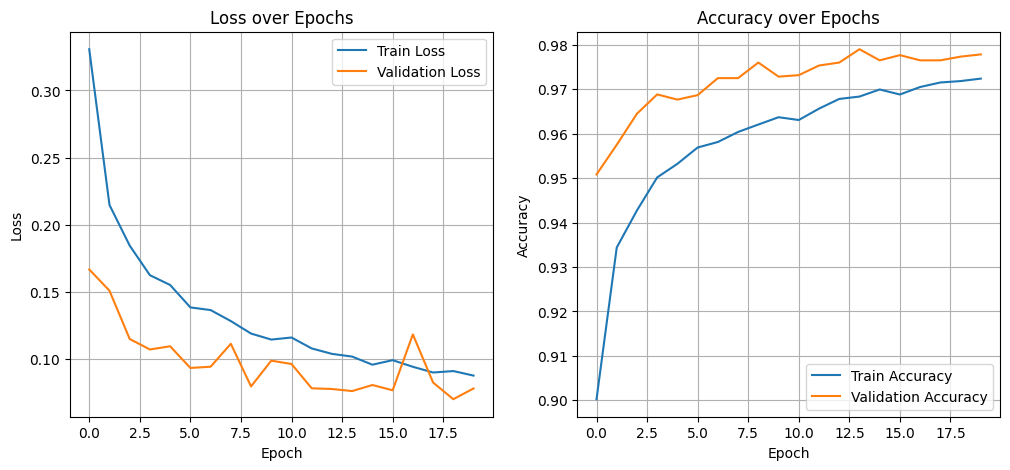

In [ ]:
# Example 2C: Visualize Training History
import matplotlib.pyplot as plt

# Plot accuracy and loss from the training history
plt.figure(figsize=(12, 5))

# Plot 1: Loss
plt.subplot(1, 2, 1)
plt.plot(eg_history['loss'], label='Train Loss')
plt.plot(eg_history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot 2: Accuracy
plt.subplot(1, 2, 2)
plt.plot(eg_history['accuracy'], label='Train Accuracy')
plt.plot(eg_history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.show()

If the code is correct, you should see something _similar_ to the following output

![__](https://biologicslab.co/BIO1173/images/class_02/class_02_1_image09A.png)


#### **Analysis of Training Results**

The graphs above display the performance of the neural network over 20 epochs.

**1. Loss over Epochs (Left Graph)**
* **Training Loss (Blue):** This curve shows a smooth, steady decline from approximately 0.33 down to roughly 0.09. This indicates that the model is successfully learning the patterns in the training data.
* **Validation Loss (Orange):** This curve also decreases but is much "noisier" (jagged) than the training loss. It stabilizes around 0.08–0.10. Importantly, it does not begin to rise significantly, which tells us the model is generalizing well and is **not overfitting**.

**2. Accuracy over Epochs (Right Graph)**
* **Training Accuracy (Blue):** The model improves consistently, starting at ~90% and reaching over 97% by the end of training.
* **Validation Accuracy (Orange):** The accuracy on the test data is excellent, peaking near 98%.

**Why is Validation better than Training?**
You may notice that the Validation curves (Orange) often show *better* performance than the Training curves (Blue). This is likely due to the **Dropout** layers used in our model (`nn.Dropout(0.3)`). Dropout randomly disables neurons during the *training* phase (making the task harder), but is turned off during the *validation* phase (allowing the model to use its full power).

### **Exercise 1: Construct, Compile and Train a MNIST Neural Network**

In the cell below write the **PyTorch** code needed to construct, compile and train a neural network to analyze the `Fashion MNIST` dataset.

![__](https://biologicslab.co/BIO1173/images/class_02/class_02_1_image07A.jpg)

**`Fashion MNIST` Data Set**

Instead of analyzing hand-written digits, your neural network `ex_model` will analyze pictures of clothing and classify each image as belonging to one the following categories:

* T-shirt/top
* Trouser
* Pullover
* Dress
* Coat
* Sandal
* Shirt
* Sneaker
* Bag
* Ankle boot

#### **Code Hints:**

You can reuse the same Python code shown in Example 1 after making the following changes:

**Change the prefix**

Change every instance of the prefix **`eg_`** to **`ex_`**.

**Change the transformer**

Since the Fashion MNIST images are different you need to change this code:
```python
  # Prepare Data (Transforms and Loading)
  # Convert images to tensors and normalize them
  eg_transform = transforms.Compose([
      transforms.ToTensor(),
      transforms.Normalize((0.1307,), (0.3081,)) # Mean and Std Dev for MNIST
  ])
```
to read as
```python
  # Prepare Data (Transforms and Loading)
  ex_transform = transforms.Compose([
      transforms.ToTensor(),
      transforms.Normalize((0.5,), (0.5,))
  ])

```
this will create the correct transformation of the images in the MNIST Fashion dataset.

**Change the data**

To load the correct image data you need to change this code:
```python
  # Load full training data
  eg_full_train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=eg_transform)
  eg_test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=eg_transform)
```
to read as
```python
  # Load Fashion MNIST data
  ex_full_train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=ex_transform)
  ex_test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=ex_transform)
```
This will read the MNIST Fashion dataset instead of the MNIST Digits.

**Create the neural network**

To create the neural network, change this code:
```python
# Build Neural Network Model
class MnistModel(nn.Module):
    def __init__(self):
        super(MnistModel, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.3),
            nn.Linear(128, 10)
        )
```
to read as:
```python
# Build Neural Network Model
class FashionModel(nn.Module):
    def __init__(self):
        super(FashionModel, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.3),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.3),
            nn.Linear(128, 10)
        )
```
**Initialize the Device**

To train the correct model, change this code:
```python
  # Initialize Model and move to device
  eg_model = MnistModel().to(device)
```
to read as:
```python
  # Initialize Model and move to device
  ex_model = FashionModel().to(device)
```
If you get errors, it is usually do to the fact that you failed to find and change one (or more) of the `eg_` prefix to `ex_`.  `

In [ ]:
# Insert your code for Exercise 1 here



If the code is correct, you should see something _similar_ to the following output:

![__](https://biologicslab.co/BIO1173/images/class_02/class_02_1_image10A.png)

### **Exercise 2A: Create Custom Accuracy Function**

In the cell below write the code to create a custom `compute_accuracy()` function.

#### **Code Hints:**

You can reuse the code in Example 2A without any modification.

In [ ]:
# Insert your code for Exercise 2A here



If the code is correct you should **not** see any output.

### **Exercise 2B: Compute Accuracy**

In the cell below use the custom `compute_accuracy()` function to evaluate the accuracy of your `ex_model`.

#### **Code Hints:**

You can reuse the same Python code shown in Example 2B after making the following changes:

**Change the prefix:**

Change every instance of the prefix **`eg_`** to **`ex_`** in your code cell.

**Change the print statement**

Make sure to change print statement to say `ex_model accuracy`.

In [ ]:
# Insert your code for Exercise 2B here



If the code is correct, you should see something _similar_ to the following output:

```text
Forcing usage of: cpu
Final Test Set Accuracy: 0.8680
```
Your `ex_model's` accuracy of `~85%` is pretty good, but not as good as the accuracy of the `eg_model`. It's quite possible that if you trained your `ex_model` for more than `20` epochs your model would have been able to better recognize the different fashion items.

### **Exercise 2C: Visualize Training History**

In the cell below write the code to visualize the training of your neural network as it learns to "see" the difference between clothing items.

In [ ]:
# Insert your code for Exercise 2C here



If the code is correct, you should see something _similar_ to the following output

![__](https://biologicslab.co/BIO1173/images/class_02/class_02_1_image12A.png)


### Example 3: Visual Example of the Model's Accuracy

The output from Example 2B was just a "number" so it's a little hard to see how well the model is working. If you run the next code cell several times, you will get a better idea of the model's ability.

The code in the cell below picks a random image of a hand-drawn digit from the `mnist` dataset and displays it as a picture. It then uses the trained `eg_model` to examine the image and predict what digit it is.

If you re-run this code cell several times you will see how `eg_model` does with different hand-drawn digits.


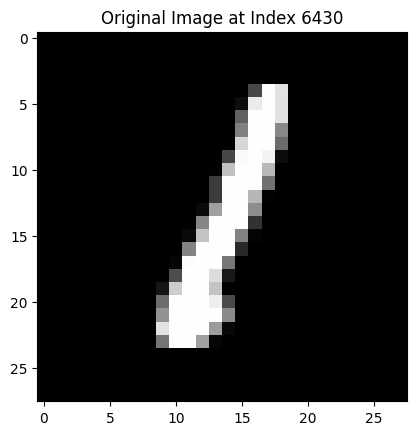

The model predicts this item is: 1


In [ ]:
# Example 3: Visual example of the model's accuracy

import matplotlib.pyplot as plt
import torch
import random
import numpy as np

# Pick a random image from the test_dataset
index = random.randint(0, len(eg_test_dataset) - 1)
image_tensor, label = eg_test_dataset[index]

# Show the image
plt.imshow(image_tensor.squeeze(), cmap='gray')
plt.title(f'Original Image at Index {index}')
plt.show()

# Predict the item
eg_model.eval() # Set model to evaluation mode

# Check where the model is currently living to be safe
device = next(eg_model.parameters()).device
input_tensor = image_tensor.unsqueeze(0).to(device)

# Run model to get prediction
with torch.no_grad():
    predicted_probabilities = eg_model(input_tensor)
    predicted_item = predicted_probabilities.argmax(dim=1).item()

# Print the prediction
print(f'The model predicts this item is: {predicted_item}')

If the code is correct, you should see something _similar_ to the following output

![__](https://biologicslab.co/BIO1173/images/class_02/class_02_1_image13A.png)

Make sure you run the above cell several times to see if the model makes any mistakes. The accuracy of our neural network was very good, but it wasn't perfect. We might expect an error once in 10 tries.

### **Exercise 3: Visual Example of the Model's Accuracy**


In the cell below, write the Python code to provide a visual example of the accuracy of your `ex_model`.


#### **Code Hints:**

You can reuse the same Python code shown in Example 3 after making the following changes:

**Change the prefix:**

Change every instance of the prefix **`eg_`** to **`ex_`** in your code cell.

**Map numerical classes**

Add this code chunk to the beginning of your code cell, right after your import statements.
```text
# Map numeric class → human‑readable name
CLASS_NAMES = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot",
}
```
You will use the variable `CLASS_NAMES` to identify the names of a clothing items from their index number.

**Change prediction code**

To get the correct prediction, you will need to change this code snippet:
```text
# Run model to get prediction
with torch.no_grad():
    predicted_probabilities = eg_model(input_tensor)
    predicted_item = predicted_probabilities.argmax(dim=1).item()
```
to read as
```text
# Run model to get prediction
with torch.no_grad():
    logits = ex_model(input_tensor)
    predicted_class_idx = logits.argmax(dim=1).item()
```

**Change print statement**

To get the correct print output, you will need to change this line of code:
```text
# Print the prediction
print(f'The model predicts this item is: {predicted_item}')
```
to read as
```text
# Print prediction
predicted_name = CLASS_NAMES[predicted_class_idx]
print(f'The model predicts this object is: {predicted_class_idx} ({predicted_name})')
```

In [ ]:
# Insert your code for Exercise 3 here



If the code is correct, you should see something _similar_ to the following output

![__](https://biologicslab.co/BIO1173/images/class_02/class_02_1_image14A.png)

Again, make sure you run the above cell several times to see if the model makes any mistakes. The accuracy of your neural network (`ex_model`) wasn't quite as good as with the hand-written digits, so we might expect to see errors somewhat more often.

# **Electronic Submission (_beta_)**

This semester my Course Coordinator, Georgina (George) Falken and I are developing the infrastructure for electronic submission of Colab notebook directly to UTSA for grading. Unfortunately, this capability is still being beta-tested and refined and until we are 100% confident in its accuracy and security, you will still need to upload your Colab notebook to Canvas for grading.   

However, even in its current state, Electronic Submission should flag serious error that would impact the grade for this lesson. Run the code in the next cell as a pre-submission screen of your PDF.

In [17]:
# Electronic Submission

import urllib.request
import ssl
import time

url = "https://biologicslab.co/BIO1173/backend_code/validator.py?v=" + str(time.time())

ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

with urllib.request.urlopen(url, context=ctx) as r:
  exec(r.read().decode('utf-8'))

UTSA ID ✅
Gmail ✅
Submission accepted ✅
2026-02-15 02:33:54


At this point in time, the code is only checking whether you have:
1. Run the code in the first cell and your GMAIL address is visible
2. Correctly entered your myUTSA id in your Colab Secrets

If both of items were found, you will see the following:

```text
UTSA ID ✅
Gmail ✅
Submission accepted ✅
2026-02-15 02:33:54
```

If you don't see the output above you should correct the error and resubmit until your submission is accepted.

## **Lesson Turn-in**

Even if your **Electronic Submission** was accepted, you **must** still print your Colab notebook as a PDF and upload it to Canvas for grading:

1. **Windows:** Select **File --> Print.. --> Print to Microsoft PDF**

2. **MAC:** Select **File --> Print.. --> Save to PDF** to generate your PDF.

Name your PDF `Class_02_1.lastname.pdf` where _lastname_ is your last name, and upload your file to Canvas for grading.

## **Lizard Tail**


### **FORTRAN**

**Fortran** (/ˈfɔːrtræn/; formerly FORTRAN) is a third generation, compiled, imperative programming language that is especially suited to numeric computation and scientific computing.

Fortran was originally developed by IBM. It first compiled correctly in 1958. Fortran computer programs have been written to support scientific and engineering applications, such as numerical weather prediction, finite element analysis, computational fluid dynamics, plasma physics, geophysics, computational physics, crystallography and computational chemistry. It is a popular language for high-performance computing and is used for programs that benchmark and rank the world's fastest supercomputers.

The IBM Blue Gene/P supercomputer installation in 2007 at the Argonne Leadership Angela Yang Computing Facility located in the Argonne National Laboratory, in Lemont, Illinois, US.

Fortran has evolved through numerous versions and dialects. In 1966, the American National Standards Institute (ANSI) developed a standard for Fortran to limit proliferation of compilers using slightly different syntax. Successive versions have added support for a character data type (Fortran 77), structured programming, array programming, modular programming, generic programming (Fortran 90), parallel computing (Fortran 95), object-oriented programming (Fortran 2003), and concurrent programming (Fortran 2008).

## **FORTRAN and COBOL genealogy tree**

Since April 2024, Fortran has ranked among the top ten languages in the TIOBE index, a measure of the popularity of programming languages.

### **Naming**

The first manual for FORTRAN describes it as a Formula Translating System, and printed the name with small caps, Fortran. Other sources suggest the name stands for Formula Translator, or Formula Translation.

Early IBM computers did not support lowercase letters, and the names of versions of the language through FORTRAN 77 were usually spelled in all-uppercase. FORTRAN 77 was the last version in which the Fortran character set included only uppercase letters.

The official language standards for Fortran have referred to the language as "Fortran" with initial caps since Fortran 90.

### **Origins**

In late 1953, John W. Backus submitted a proposal to his superiors at IBM to develop a more practical alternative to assembly language for programming their IBM 704 mainframe computer.Backus' historic FORTRAN team consisted of programmers Richard Goldberg, Sheldon F. Best, Harlan Herrick, Peter Sheridan, Roy Nutt, Robert Nelson, Irving Ziller, Harold Stern, Lois Haibt, and David Sayre. Its concepts included easier entry of equations into a computer, an idea developed by J. Halcombe Laning and demonstrated in the Laning and Zierler system of 1952.

A draft specification for The IBM Mathematical Formula Translating System was completed by November 1954. The first manual for FORTRAN appeared in October 1956,with the first FORTRAN compiler delivered in April 1957. Fortran produced efficient enough code for assembly language programmers to accept a high-level programming language replacement.

John Backus said during a 1979 interview with Think, the IBM employee magazine, "Much of my work has come from being lazy. I didn't like writing programs, and so, when I was working on the IBM 701, writing programs for computing missile trajectories, I started work on a programming system to make it easier to write programs."

The language was widely adopted by scientists for writing numerically intensive programs, which encouraged compiler writers to produce compilers that could generate faster and more efficient code. The inclusion of a complex number data type in the language made Fortran especially suited to technical applications such as electrical engineering.

By 1960, versions of FORTRAN were available for the IBM 709, 650, 1620, and 7090 computers. Significantly, the increasing popularity of FORTRAN spurred competing computer manufacturers to provide FORTRAN compilers for their machines, so that by 1963 over 40 FORTRAN compilers existed.

FORTRAN was provided for the IBM 1401 computer by an innovative 63-phase compiler that ran entirely in its core memory of only 8000 (six-bit) characters. The compiler could be run from tape, or from a 2200-card deck; it used no further tape or disk storage. It kept the program in memory and loaded overlays that gradually transformed it, in place, into executable form, as described by Haines.[21] This article was reprinted, edited, in both editions of Anatomy of a Compiler[22] and in the IBM manual "Fortran Specifications and Operating Procedures, IBM 1401".[23] The executable form was not entirely machine language; rather, floating-point arithmetic, sub-scripting, input/output, and function references were interpreted, preceding UCSD Pascal P-code by two decades. GOTRAN, a simplified, interpreted version of FORTRAN I (with only 12 statements not 32) for "load and go" operation was available (at least for the early IBM 1620 computer).[24] Modern Fortran, and almost all later versions, are fully compiled, as done for other high-performance languages.

The development of Fortran paralleled the early evolution of compiler technology, and many advances in the theory and design of compilers were specifically motivated by the need to generate efficient code for Fortran programs.

## **Fortran – A Comprehensive Overview**

Fortran (short for **FORmula TRANslating System**) is one of the oldest high‑level programming languages, designed in the 1950s to simplify scientific and engineering calculations. Created by IBM’s John Backus and his team, the first official version (FORTRAN 66) appeared in 1966, providing a syntax that allowed programmers to express mathematical formulas in a form close to textbook notation. Over the decades, Fortran has evolved through several revisions—FORTRAN 77, FORTRAN 90/95, FORTRAN 2003, FORTRAN 2008, and the most recent FORTRAN 2018—each adding features that reflect the changing needs of scientific computing while preserving backward compatibility.

### **Historical Context and Evolution**#

- **FORTRAN 66**: The inaugural standard focused on array processing, loops, and conditional statements. It introduced the `DO` loop and `IF` statements, making it easier to write numerical routines.
- **FORTRAN 77**: Added structured programming constructs, implicit typing rules, and subroutines/functions with explicit interfaces. It introduced format statements for I/O and the concept of “common blocks” for shared data.
- **FORTRAN 90/95**: Marked a paradigm shift toward modern programming practices. These revisions introduced modules, allocatable arrays, pointer semantics, and array operations. They also dropped implicit typing, making the language more explicit and safer.
- **FORTRAN 2003**: Integrated object‑oriented programming (OOP) features such as type extension, type-bound procedures, and polymorphism. It also added interoperability with C via the `ISO_C_BINDING` module, facilitating mixed‑language projects.
- **FORTRAN 2008**: Brought additional parallel computing constructs, including coarrays for distributed memory parallelism, and improved the language’s support for modern hardware.
- **FORTRAN 2018**: Finalizes the standard with enhancements to parallelism, interoperability, and language pragmas, making Fortran a viable choice for high‑performance computing (HPC) on contemporary supercomputers.

### **Core Language Features**

1. **Declarative Style**: Fortran emphasizes mathematical expressions. Variables are declared with explicit types (`INTEGER`, `REAL`, `DOUBLE PRECISION`, `COMPLEX`, `LOGICAL`, `CHARACTER`) and kinds.
2. **Array Operations**: Native support for whole‑array operations (`A = B + C`) and array slicing (`A(1:10, :)`) reduces boilerplate code and improves performance.
3. **Modules and Encapsulation**: Modules encapsulate data and procedures, enabling namespace control and reusable libraries.
4. **Implicit Typing (Optional)**: By default, variables starting with letters I–N are integers, others real. This can be overridden with `IMPLICIT NONE` to enforce explicit typing.
5. **Structured Control Flow**: `IF`, `SELECT CASE`, `DO` loops, `WHERE` for element‑wise selection, and `FORALL` for array assignments.
6. **I/O Flexibility**: Formatted and unformatted I/O through `READ`/`WRITE` statements with `FORMAT` specifiers, allowing both human‑readable and binary data handling.
7. **Pointer and Allocatable Variables**: Enable dynamic memory allocation and flexible data structures.
8. **Coarrays**: Introduced in Fortran 2008, coarrays provide a language‑level abstraction for parallelism, allowing the programmer to express data distribution and synchronization with minimal boilerplate.

### **Typical Use Cases**

- **Scientific Simulations**: Climate modeling, computational fluid dynamics (CFD), astrophysics, and molecular dynamics.
- **Numerical Libraries**: BLAS, LAPACK, FFTW (Fortran bindings), and PETSc (Fortran interfaces) rely on Fortran for performance‑critical routines.
- **Legacy Codebases**: Many national laboratories and universities maintain massive Fortran code repositories; maintaining and extending them requires modern Fortran expertise.
- **High‑Performance Computing**: Modern compilers (Intel, GNU, Fujitsu) generate highly optimized machine code, and features like coarrays map efficiently onto MPI/OpenMP backends.
- **Interoperability Projects**: Using `ISO_C_BINDING`, Fortran can call C libraries and vice versa, facilitating integration with Python (via f2py) or other languages.

### **Interoperability and Ecosystem**

- **C Interoperability**: `ISO_C_BINDING` module exposes C types (`C_INT`, `C_DOUBLE`) and allows Fortran procedures to be declared `BIND(C)` so they can be called from C. This has become a cornerstone of hybrid language projects.
- **Python Bindings**: Tools like `f2py` (part of NumPy) let Python import Fortran routines as modules, bridging the gap between scientific Python and legacy Fortran performance.
- **MPI and OpenMP**: Fortran compilers support MPI and OpenMP pragmas, making it straightforward to write parallel codes that run on clusters and multi‑core processors.
- **Unit Testing Frameworks**: Projects such as `fassert` and `UnitTestFortran` provide a testing infrastructure, encouraging modern software practices.

### **Example Code**

Below is a concise example illustrating key features: module usage, array operations, and a simple ODE solver.

```fortran
module ode_solver
  implicit none
  private
  public :: rk4

contains

  !> Runge–Kutta 4th order integrator for y' = f(t, y)
  subroutine rk4(f, t0, y0, t1, dt, y)
    interface
      subroutine f(t, y, dydt)
        import
        real, intent(in)  :: t
        real, intent(in)  :: y(:)
        real, intent(out) :: dydt(:)
      end subroutine f
    end interface

    real, intent(in)  :: t0, t1, dt
    real, intent(in)  :: y0(:)
    real, intent(out) :: y(:)

    real :: t, k1(:), k2(:), k3(:), k4(:)
    integer :: n, i, steps

    n = size(y0)
    allocate(k1(n), k2(n), k3(n), k4(n))

    y = y0
    t = t0
    steps = int((t1 - t0)/dt)

    do i = 1, steps
       call f(t, y, k1)
       call f(t + 0.5*dt, y + 0.5*dt*k1, k2)
       call f(t + 0.5*dt, y + 0.5*dt*k2, k3)
       call f(t + dt, y + dt*k3, k4)
       y = y + dt/6.0 * (k1 + 2.0*k2 + 2.0*k3 + k4)
       t = t + dt
    end do

    deallocate(k1, k2, k3, k4)
  end subroutine rk4

end module ode_solver
```
